# Convolutional neural networks

To classify an image we need to flatten the data to one dimension, when using typical machine learning algorithms. It is better to build a model that can handle two-dimensional data as it is, otherwise, some information embedded in the data, such as positional relationships, is lost when flattened to one dimension.
Convolutional Neural Networks (CNN) solve this problem. In CNN, features are extracted from two-dimensional input data through convolutional layers and pooling layers, and then these features are put into a multi-layer perceptron (MLP) for classification.

## Convolution

Convolutional layers perform convolution, which means applying several filters to the image to extract features. These filters are called kernels, and convolved images are called feature maps. The number of kernels corresponds to the number of feature maps. The kernel slides across the image and returns the summation of its values within the kernel as a multiplication filter. We don't have to set these kernel values manually, CNN itself will learn the the weights of kernels through the learning algorithm. Connections among neurons in convolutional layers are limited to their kernel size, thus, CNN are able to acquire translation invariance when kernels are optimized.

## Pooling

In a max-pooling layer, the input image is segmented into a set of non-overlapping sub-data and the maximum value is output from each data. This process is necessary to make the network keep its translation invariance and also reduces the computation for the upper layers.

With convolution and pooling, CNN can acquire robust features from the input, and the final MLP layer  can proceed with the classification of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import misc, ndimage
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K

Using TensorFlow backend.


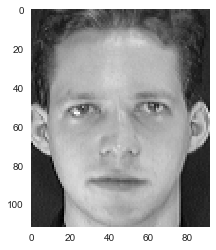

In [2]:
plt.gray()
x_0 = misc.imread('faces/s1/1.pgm', flatten=True)
plt.imshow(x_0)
plt.grid(False)
plt.show()

In [3]:
x_0.shape

(112, 92)

In [4]:
x = []
y = []

for j in range(1,11):
  for k in range(1,11):
    image_filename = 'faces/s%d/%d.pgm'%(j,k)
    image = misc.imread(image_filename, flatten=True)
    #h = 28.0/image.shape[0]
    #l = 28.0/image.shape[1]
    #image = ndimage.zoom(image,(h,l))
    x.append(image)
    y.append('%d'%(j-1))

In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
x.shape

(100, 112, 92)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

In [8]:
num_classes = 10
img_rows, img_cols = 112, 92
input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train /= 255
x_test /= 255

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential()
model.add(Conv2D(filters = 40, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid')) #'sigmoid','relu' rectified linear unit

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
#loss='mean_squared_error', optimizer='sgd'

In [13]:
model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
70/70 [==============================] - 1s - loss: 2.5751 - acc: 0.1571     
Epoch 2/15
70/70 [==============================] - 0s - loss: 2.1972 - acc: 0.2571     
Epoch 3/15
70/70 [==============================] - 0s - loss: 1.9478 - acc: 0.3429     
Epoch 4/15
70/70 [==============================] - 0s - loss: 1.7275 - acc: 0.3714     
Epoch 5/15
70/70 [==============================] - 0s - loss: 1.2791 - acc: 0.5286     
Epoch 6/15
70/70 [==============================] - 0s - loss: 1.0077 - acc: 0.5857     
Epoch 7/15
70/70 [==============================] - 0s - loss: 0.7273 - acc: 0.8143     
Epoch 8/15
70/70 [==============================] - 0s - loss: 0.2626 - acc: 0.9571     
Epoch 9/15
70/70 [==============================] - 0s - loss: 0.1373 - acc: 0.9857     
Epoch 10/15
70/70 [==============================] - 0s - loss: 0.1419 - acc: 0.9857     
Epoch 11/15
70/70 [==============================] - 0s - loss: 0.0737 - acc: 1.0000     
Epoch 12/15
70/70 [

In [14]:
y_pred = model.predict(x_test, batch_size= x_test.shape[0])

In [15]:
# Reversing to_categorical
y_pred_r = np.argmax(y_pred,axis=1)
y_test_r = np.argmax(y_test,axis=1)

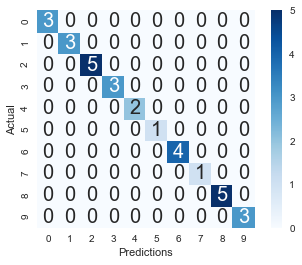

In [16]:
table = pd.crosstab(y_test_r, y_pred_r, rownames=['Actual'], colnames=['Predictions'])

sbn.heatmap(table, cbar=True, cmap='Blues',annot=True, square=True, fmt='d', annot_kws={'size': 20})

plt.show()

In [17]:
model.evaluate(x_test, y_test, verbose=0) # [loss, accuracy]

[0.12448368221521378, 1.0]